# Python for Data Analysis


In [1]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read csv file and give it a name
df = pd.read_csv("https://raw.githubusercontent.com/wangx346/MAS651/main/Salaries.csv")

In [3]:
#Display a few first records
df.head(6)

,rank,discipline,phd,service,gender,salary
0,Prof,B,56,49,Male,236960
1,Prof,A,12,6,Male,143000
2,Prof,A,23,20,Male,160515
3,Prof,A,40,31,Male,181205
4,Prof,B,20,18,Male,154800
5,Prof,A,20,20,Male,172400


In [6]:
#Display the last 5 records
df.tail(5)

,rank,discipline,phd,service,gender,salary
73,Prof,B,18,10,Female,155450
74,AssocProf,B,19,6,Female,154542
75,Prof,B,17,17,Female,174312
76,Prof,A,28,14,Female,159954
77,Prof,A,23,15,Female,159646


---

In [9]:
#Identify the type of df object
type(df)

pandas.core.frame.DataFrame

In [10]:
#Check the type of a column "salary"
df['salary'].dtype

dtype('int64')

In [6]:
#List the types of all columns
df.dtypes

rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object

In [11]:
#List the column names
df.columns

Index(['rank', 'discipline', 'phd', 'service', 'gender', 'salary'], dtype='object')

In [12]:
#Total number of elements in the Data Frame
df.size

468

In [13]:
#Number of rows and columns
df.shape

(78, 6)

In [13]:
#Output basic statistics for the numeric columns
df.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,158023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,107800.000000
25%,10.250000,5.250000,138612.500000
50%,18.500000,14.500000,154671.000000
75%,27.750000,20.750000,176774.750000
max,56.000000,51.000000,236960.000000


In [14]:
#Calculate mean for all numeric columns
df.mean()

phd            19.705128
service        15.051282
salary     158023.782051
dtype: float64

In [15]:
#Calculate the standard deviation (std() method) for all numeric columns
df.std()

phd           12.498425
service       12.139768
salary     28293.661022
dtype: float64

---
### Data slicing and grouping

In [16]:
#Extract a column by name (method 1)
df['gender'].head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: gender, dtype: object

In [17]:
#Extract a column by name (method 2)
# Note: there is an attribute rank for pandas data frames, 
#so to select a column with a name "rank" we should use method 1.

df.gender.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: gender, dtype: object

In [21]:
#Group data using rank
# "groupby" splits the data into groups based on some criteria

df_rank = df.groupby(['rank'])

In [24]:
#Calculate mean of all numeric columns for the grouped object
df_rank.mean()

,phd,service,salary
rank,,,
AssocProf,15.076923,11.307692,91786.230769
AsstProf,5.052632,2.210526,81362.789474
Prof,27.065217,21.413043,123624.804348


In [22]:
df.groupby('gender').mean()

,phd,service,salary
gender,,,
Female,16.512821,11.564103,151002.410256
Male,22.897436,18.538462,165045.153846


In [23]:
#Calculate the mean salary for men and women. 
#The following produce Pandas Series (single brackets around salary)

df.groupby('gender')['salary'].mean()

gender
Female    151002.410256
Male      165045.153846
Name: salary, dtype: float64

In [24]:
# If we use double brackets Pandas will produce a DataFrame
df.groupby('gender')[['salary']].mean()

,salary
gender,
Female,151002.410256
Male,165045.153846


In [25]:
# Group using 2 variables - sex and rank:
df.groupby(['rank','gender'], sort=True)[['salary']].mean()

salary
rank      gender               
AssocProf Female  138512.800000
          Male    152697.666667
AsstProf  Female  128049.909091
          Male    135918.000000
Prof      Female  171967.611111
          Male    174690.142857

---
### Filtering

In [26]:
#Select observation with the value in the salary column > 150K
df_sub = df[ df['salary'] > 150000]
df_sub.head()

,rank,discipline,phd,service,gender,salary
0,Prof,B,56,49,Male,236960
2,Prof,A,23,20,Male,160515
3,Prof,A,40,31,Male,181205
4,Prof,B,20,18,Male,154800
5,Prof,A,20,20,Male,172400


In [27]:
#Select data for female professors
df_w = df[ df['gender'] == 'Female']
df_w.head()

,rank,discipline,phd,service,gender,salary
39,Prof,B,18,18,Female,179000
40,Prof,A,39,36,Female,187000
41,AssocProf,A,13,8,Female,124830
42,AsstProf,B,4,2,Female,130225
43,AsstProf,B,5,0,Female,127000


In [28]:
# Using filtering, find the mean value of the salary for the discipline A
df[ df['discipline'] =='A'].mean().round(2)

phd            21.53
service        15.72
salary     148331.11
dtype: float64

---
### More on slicing the dataset

In [29]:
#Select column salary
df1 = df['salary']

In [30]:
#Check data type of the result
type(df1)

pandas.core.series.Series

In [31]:
#Look at the first few elements of the output
df1.head()

0    236960
1    143000
2    160515
3    181205
4    154800
Name: salary, dtype: int64

In [32]:
#Select column salary and make the output to be a data frame
df2 = df[['salary']]

In [33]:
#Check the type
type(df2)

pandas.core.frame.DataFrame

In [34]:
#Select a subset of rows (based on their position):
# Note 1: The location of the first row is 0
# Note 2: The last value in the range is not included
df[10:15]

,rank,discipline,phd,service,gender,salary
10,Prof,B,39,33,Male,178250
11,Prof,B,23,23,Male,184778
12,AsstProf,B,1,0,Male,138000
13,Prof,B,35,33,Male,212200
14,Prof,B,25,19,Male,203750


In [35]:
#If we want to select both rows and columns we can use method .loc
df.loc[10:15,['rank', 'gender','salary']]

,rank,gender,salary
10,Prof,Male,178250
11,Prof,Male,184778
12,AsstProf,Male,138000
13,Prof,Male,212200
14,Prof,Male,203750
15,Prof,Male,200480


In [36]:
df_sub[10:20]

,rank,discipline,phd,service,gender,salary
15,Prof,B,17,3,Male,200480
18,Prof,A,19,7,Male,157300
19,Prof,A,29,27,Male,200500
21,Prof,A,33,30,Male,153106
26,Prof,A,38,19,Male,198750
27,Prof,A,45,43,Male,205865
29,Prof,B,21,20,Male,173683
30,AssocProf,B,9,7,Male,157008
31,Prof,B,22,21,Male,205750
32,Prof,A,27,19,Male,153275


In [38]:
#Let's see what we get for our df_sub data frame
# Method .loc subset the data frame based on the labels:
df_sub.loc[10:20,['rank','gender','salary']]

,rank,gender,salary
10,Prof,Male,178250
11,Prof,Male,184778
13,Prof,Male,212200
14,Prof,Male,203750
15,Prof,Male,200480
18,Prof,Male,157300
19,Prof,Male,200500


In [39]:
#  Unlike method .loc, method iloc selects rows (and columns) by poistion:
df_sub.iloc[10:20, [0,3,4,5]]

,rank,service,gender,salary
15,Prof,3,Male,200480
18,Prof,7,Male,157300
19,Prof,27,Male,200500
21,Prof,30,Male,153106
26,Prof,19,Male,198750
27,Prof,43,Male,205865
29,Prof,20,Male,173683
30,AssocProf,7,Male,157008
31,Prof,21,Male,205750
32,Prof,19,Male,153275


### Sorting the Data

In [43]:
#Sort the data frame by yrs.service and create a new data frame
# use function sort_values
df_sorted = df.sort_values(by = 'service')
df_sorted.head(12)

,rank,discipline,phd,service,gender,salary
55,AsstProf,A,2,0,Female,122500
23,AsstProf,A,2,0,Male,135000
43,AsstProf,B,5,0,Female,127000
17,AsstProf,B,4,0,Male,142000
12,AsstProf,B,1,0,Male,138000
52,Prof,A,12,0,Female,155000
57,AsstProf,A,3,1,Female,122500
28,AsstProf,B,7,2,Male,141300
42,AsstProf,B,4,2,Female,130225
22,AsstProf,A,4,2,Male,123000


In [44]:
#Sort the data frame by yrs.service and overwrite the original dataset
df.sort_values(by = 'service', ascending = False, inplace = True)
df.head()

,rank,discipline,phd,service,gender,salary
9,Prof,A,51,51,Male,107800
0,Prof,B,56,49,Male,236960
36,Prof,B,45,45,Male,196856
27,Prof,A,45,43,Male,205865
40,Prof,A,39,36,Female,187000


In [45]:
# Restore the original order (by sorting using sort_index)
#  axis: the axis along which to sort. The value 0 identifies the rows, and 1 identifies the columns.

df.sort_index(axis=0, ascending = True, inplace = True)
df.head()

,rank,discipline,phd,service,gender,salary
0,Prof,B,56,49,Male,236960
1,Prof,A,12,6,Male,143000
2,Prof,A,23,20,Male,160515
3,Prof,A,40,31,Male,181205
4,Prof,B,20,18,Male,154800


In [46]:
#Sort the data frame using 2 or more columns:
df_sorted = df.sort_values(by = ['service', 'salary'], ascending = [True,False])
df_sorted.head(10)

,rank,discipline,phd,service,gender,salary
52,Prof,A,12,0,Female,155000
17,AsstProf,B,4,0,Male,142000
12,AsstProf,B,1,0,Male,138000
23,AsstProf,A,2,0,Male,135000
43,AsstProf,B,5,0,Female,127000
55,AsstProf,A,2,0,Female,122500
57,AsstProf,A,3,1,Female,122500
28,AsstProf,B,7,2,Male,141300
42,AsstProf,B,4,2,Female,130225
68,AsstProf,A,4,2,Female,127500


### Missing Values

In [47]:
# Read a dataset with missing values
# This data set contains more than 160k records
flights = pd.read_csv("https://raw.githubusercontent.com/wangx346/MAS651/main/flights.csv")
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


In [49]:
# Select the rows that have at least one missing value
flights[flights.isnull().any(axis=1)].head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
330,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425,18.0,7.0
403,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EHAA,791,LGA,DFW,NaN,1389,NaN,NaN
404,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
855,2013,1,2,2145.0,16.0,NaN,NaN,UA,N12221,1299,EWR,RSW,NaN,1068,21.0,45.0
858,2013,1,2,NaN,NaN,NaN,NaN,AA,NaN,133,JFK,LAX,NaN,2475,NaN,NaN


In [50]:
# Filter all the rows where arr_delay value is missing:
flights1 = flights[ flights['arr_delay'].notnull( )]
flights1.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


In [51]:
# Remove all the observations with missing values
flights2 = flights.dropna()

In [56]:
# Fill missing values with zeros
nomiss =flights['dep_delay'].fillna(0)
nomiss.isnull().any()
nomiss.head(10)

0    2.0
1    4.0
2    2.0
3   -6.0
4   -4.0
5   -2.0
6   -2.0
7   -2.0
8   -1.0
9   -1.0
Name: dep_delay, dtype: float64

---
### Common Aggregation Functions:

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|count   | number of non-null observations
|sum   | sum of values
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|prod   | product of values
|std  | standard deviation
|var | unbiased variance



In [57]:
# Find the number of non-missing values in each column
flights.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,160754.0,160754.000000,160754.000000,158418.000000,158418.000000,158275.000000,157927.000000,160754.000000,157927.000000,160754.000000,158418.000000,158418.000000
mean,2013.0,6.547395,15.716567,1316.146006,9.463773,1517.471161,2.094537,1156.344987,180.685158,1282.445420,12.837582,32.387847
std,0.0,3.410001,8.762794,470.823715,36.545109,510.695413,41.479349,695.884283,97.507866,765.895383,4.725552,18.687423
min,2013.0,1.000000,1.000000,1.000000,-33.000000,1.000000,-75.000000,1.000000,21.000000,17.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,855.000000,-5.000000,1112.000000,-19.000000,504.000000,111.000000,733.000000,8.000000,16.000000
50%,2013.0,7.000000,16.000000,1345.000000,-2.000000,1541.000000,-7.000000,1157.000000,153.000000,1076.000000,13.000000,32.000000
75%,2013.0,10.000000,23.000000,1725.000000,7.000000,1944.000000,9.000000,1715.000000,258.000000,1728.000000,17.000000,51.000000
max,2013.0,12.000000,31.000000,2400.000000,1014.000000,2400.000000,1007.000000,2599.000000,695.000000,4963.000000,24.000000,59.000000


In [58]:
# Find mean value for all the columns in the dataset
flights.min()

year         2013
month           1
day             1
dep_time        1
dep_delay     -33
arr_time        1
arr_delay     -75
carrier        AA
flight          1
origin        EWR
dest          ANC
air_time       21
distance       17
hour            0
minute          0
dtype: object

In [59]:
# Let's compute summary statistic per a group':
flights.groupby('carrier')['dep_delay'].mean()

carrier
AA     8.586016
AS     5.804775
DL     9.264505
UA    12.106073
US     3.782418
Name: dep_delay, dtype: float64

In [60]:
# We can use agg() methods for aggregation:
flights[['dep_delay','arr_delay']].agg(['min','mean','max'])

,dep_delay,arr_delay
min,-33.000000,-75.000000
mean,9.463773,2.094537
max,1014.000000,1007.000000


In [57]:
# An example of computing different statistics for different columns
flights.agg({'dep_delay':['min','mean',max], 'carrier':['nunique']})

,dep_delay,carrier
max,1014.000000,NaN
mean,9.463773,NaN
min,-33.000000,NaN
nunique,NaN,5.0


### Basic descriptive statistics

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|std  | standard deviation
|var | unbiased variance
|sem | standard error of the mean
|skew| sample skewness
|kurt|kurtosis
|quantile| value at %


In [61]:
# Convinient describe() function computes a veriety of statistics
flights.dep_delay.describe()

count    158418.000000
mean          9.463773
std          36.545109
min         -33.000000
25%          -5.000000
50%          -2.000000
75%           7.000000
max        1014.000000
Name: dep_delay, dtype: float64

In [63]:
# find the index of the maximum or minimum value
# if there are multiple values matching idxmin() and idxmax() will return the first match
flights['dep_delay'].idxmin()  #minimum value

54111

In [64]:
# Count the number of records for each different value in a vector
flights['carrier'].value_counts()

UA    58665
DL    48110
AA    32729
US    20536
AS      714
Name: carrier, dtype: int64

### Explore data using graphics

In [70]:
#Show graphs withint Python notebook
%matplotlib inline
import matplotlib.pyplot as plt

(array([ 9., 11., 22., 11., 12.,  8.,  4.,  1.]),
 array([107800., 123945., 140090., 156235., 172380., 188525., 204670.,
        220815., 236960.]),
 <a list of 8 Patch objects>)

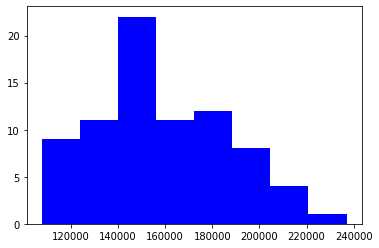

In [74]:
#Use matplotlib to draw a histogram of a salary data
plt.hist(df['salary'], 8, facecolor='blue')

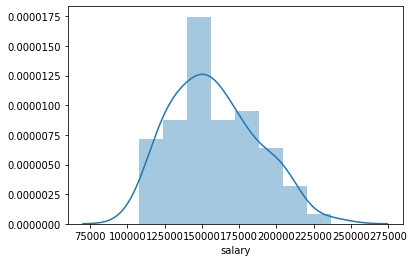

In [75]:
#Use seaborn package to draw a histogram
sns.distplot(df['salary']);

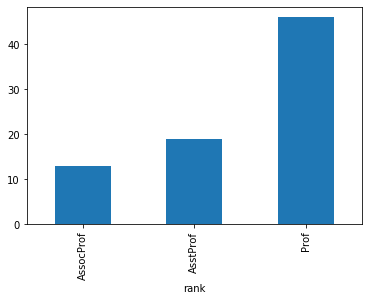

In [76]:
# Use regular matplotlib function to display a barplot
df.groupby(['rank'])['salary'].count().plot(kind='bar')

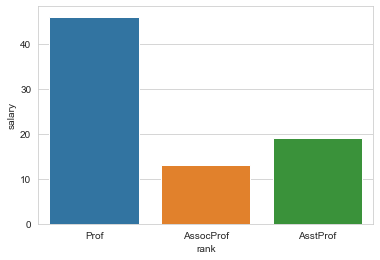

In [77]:
# Use seaborn package to display a barplot
sns.set_style("whitegrid")
ax = sns.barplot(x='rank',y ='salary', data=df, estimator=len)

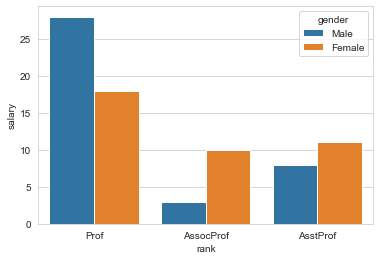

In [92]:
# Split into 2 groups:
ax = sns.barplot(x='rank',y ='salary', hue='gender', data=df, estimator=len)

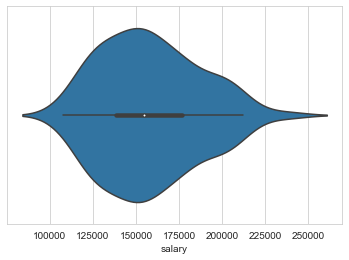

In [81]:
#Violinplot
sns.violinplot(x = "salary", data=df)

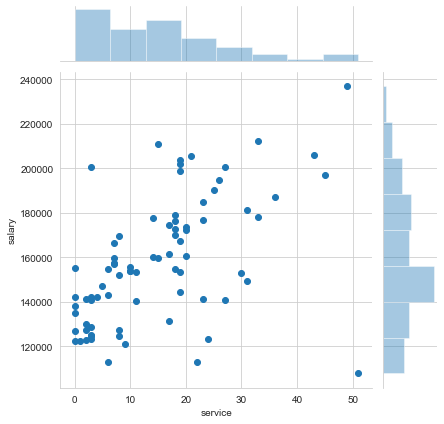

In [82]:
#Scatterplot in seaborn
sns.jointplot(x='service', y='salary', data=df)

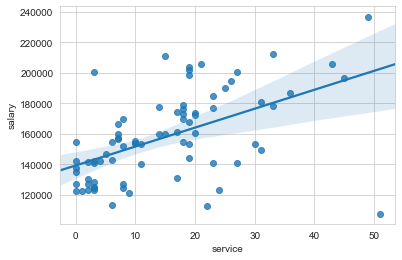

In [83]:
#If we are interested in linear regression plot for 2 numeric variables we can use regplot
sns.regplot(x='service', y='salary', data=df)

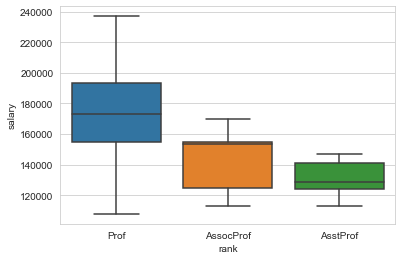

In [84]:
# box plot
sns.boxplot(x='rank',y='salary', data=df)

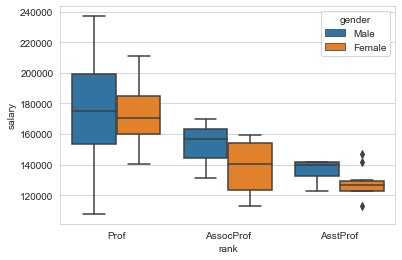

In [88]:
# side-by-side box plot
sns.boxplot(x='rank',y='salary', data=df, hue='gender')

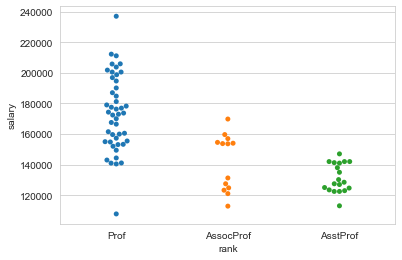

In [89]:
# swarm plot
sns.swarmplot(x='rank',y='salary', data=df)

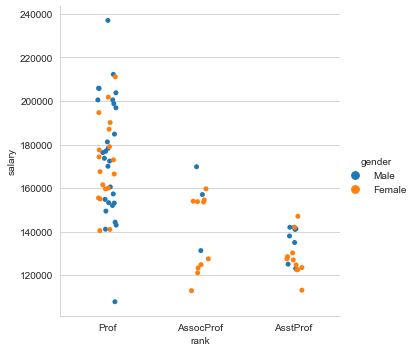

In [93]:
#catplot
sns.catplot(x='rank',y='salary', data=df, hue='gender')

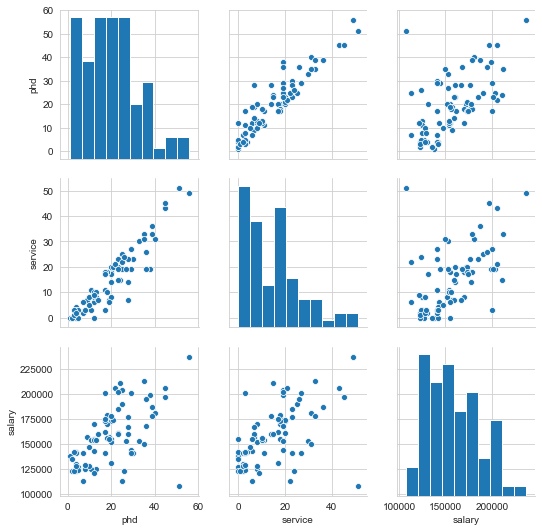

In [94]:
# Pairplot 
sns.pairplot(df)

---
## Basic statistical Analysis

### Linear Regression

In [95]:
# Import Statsmodel functions:
import statsmodels.formula.api as smf

In [99]:
# create a fitted model
lm = smf.ols(formula='salary ~ service', data=df).fit()

#print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     30.03
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           5.31e-07
Time:                        00:51:56   Log-Likelihood:                -896.72
No. Observations:                  78   AIC:                             1797.
Df Residuals:                      76   BIC:                             1802.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.394e+05   4365.651     31.921      0.0

In [100]:
# print the coefficients
lm.params

Intercept    139354.824215
service        1240.356654
dtype: float64

In [101]:
#using scikit-learn:
from sklearn import linear_model
est = linear_model.LinearRegression(fit_intercept = True)   # create estimator object
est.fit(df[['service']], df[['salary']])

#print result
print("Coef:", est.coef_, "\nIntercept:", est.intercept_)

Coef: [[1240.3566535]] 
Intercept: [139354.82421525]


---
### Student T-test

In [103]:
# Using scipy package:
from scipy import stats
df_w = df[ df['gender'] == 'Female']['salary']
df_m = df[ df['gender'] == 'Male']['salary']
stats.ttest_ind(df_w, df_m)   

Ttest_indResult(statistic=-2.2486865976699053, pvalue=0.027429778657910103)